In [2]:
import os
import sys
import numpy as np
sys.path.append("/home/xuyc/workspace/fedvar_inc")
from global_tools import load_pkl, powerset, compute_shapley_value

In [56]:
root = "/data/xuyc/save/FedVar/exp1.6_try_emnist_small/emnist_dFr0.5_nUs10_dir5.00_f1.0_e2_lEp1_s1/moon_mlp_l0.005_r0_tBa-1_mAl1.0/nr1/cid-1/results.pkl"
d = load_pkl(root)
d = d['data_split'].iloc[:,4:].T.to_numpy()

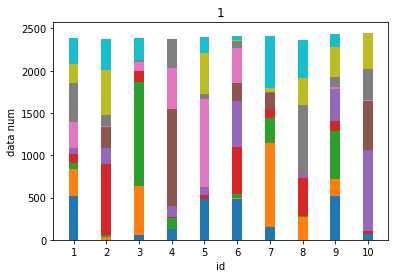

In [57]:
ax = plt.gca()
draw_dist_in_ax(d, ax, "1")

In [ ]:
root = "/data/xuyc/save/FedVar/exp1.3.1_pretrain/cifar100_nUs10_niid-label_dAl0.5_f1.0_cPe10_e1_lEp1_s1/fedavg_cnn_l0.03_r0_tBa-1/nr1/cid-1/results.pkl"
d = load_pkl(root)
d = d['data_split'].iloc[:,4:].T.numpy()

In [4]:
exp_list = ["cifar10_nUs10_dir10.00_f1.0_e500_lEp1_s1","cifar10_nUs10_dir1.00_f1.0_e500_lEp1_s1","cifar10_nUs10_iid_dAl0.5_f1.0_cPe2_e500_lEp1_s1","cifar10_nUs10_niid-label_dAl0.5_f1.0_cPe2_e500_lEp1_s1"]

In [11]:
exp_name = exp_list[0]
path = f'/data/xuyc/save/FedVar/exp1.3.1_pretrain/{exp_name}/fedavg_cnn_l0.01_r0_tBa-1/nr1/cid-1/results.pkl'
d = load_pkl(path)
d = d['data_split'].iloc[:,4:].T.to_numpy()

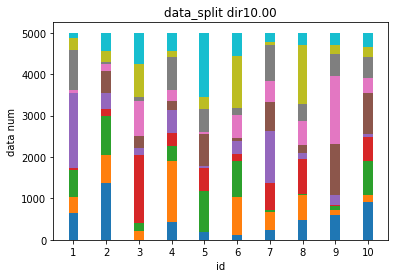

In [28]:
ax = plt.gca()
draw_dist_in_ax(d, ax, "1")

In [30]:
samples=d

def draw_dist_in_ax(samples,ax,title):
    from matplotlib import cm
    clients_num = samples.shape[0]
    class_num = samples.shape[1]
    color_x = np.linspace(0.0, 1.0, class_num)
    colors=cm.get_cmap('tab10')(color_x)
    s = samples.copy()
    accu = s[:,0].copy()

    # data
    x = list(range(1,clients_num+1))
    ax.set_xticks(x)
    ax.set_xlabel("id")
    ax.set_ylabel("data num")
    ax.bar(x, s[:,0], width=0.3, color=colors[0], label='0')
    for i in range(1, class_num):
        ax.bar(x, s[:,i], bottom=accu, width=0.3, color=colors[i], label=str(i))
        accu += s[:,i]
    ax.set_title("{}".format(title))
    # ax.legend(loc='upper right', bbox_to_anchor=(0.92, 0.8, 0.2, 0.2))
    # ax=plt.gca()
    # ax.spines['right'].set_color('none')
    # ax.spines['top'].set_color('none')

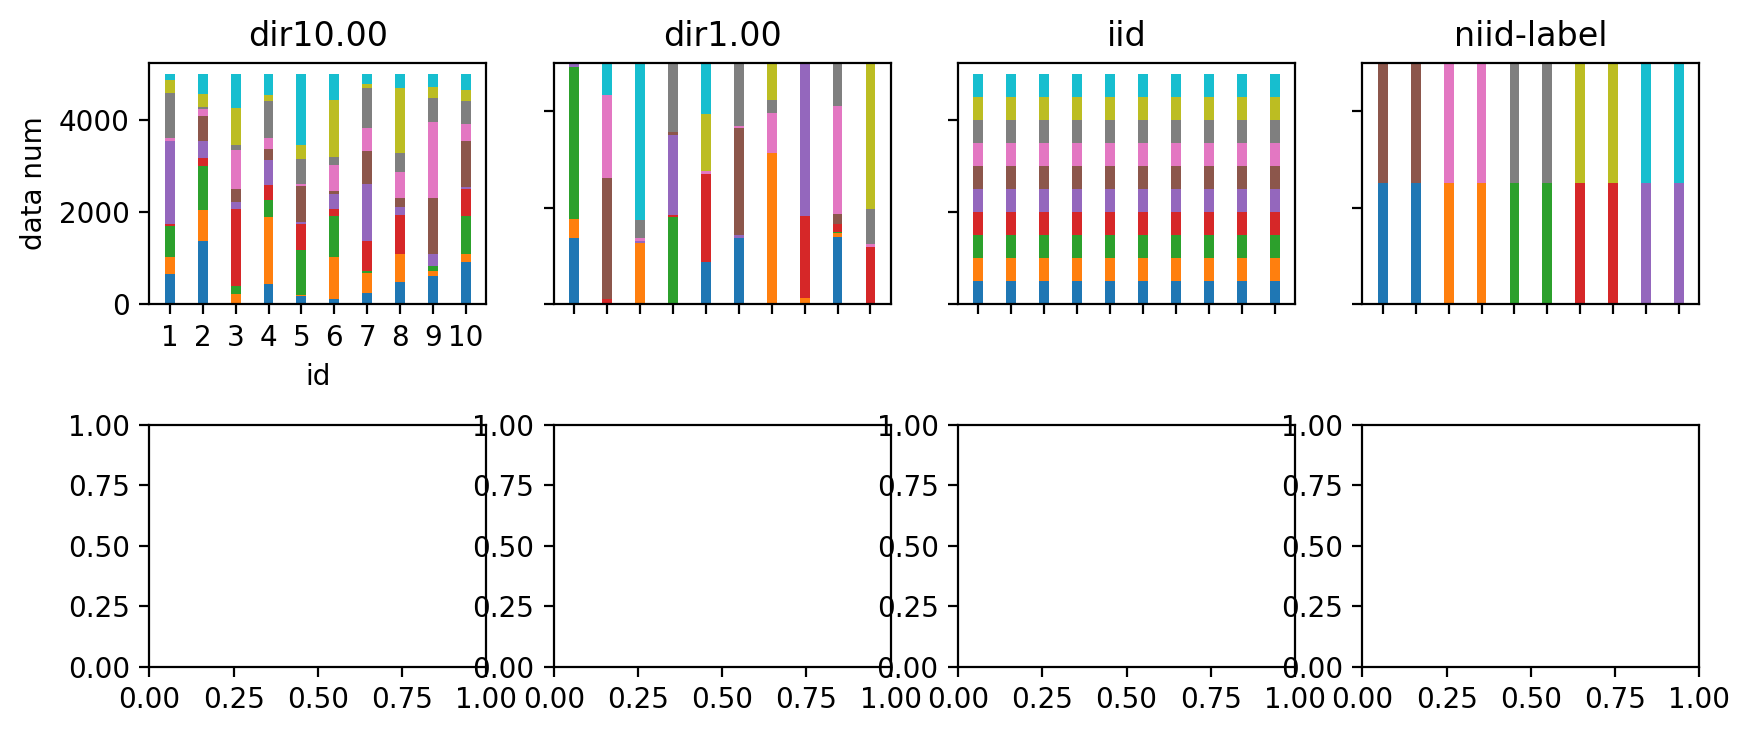

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig, axes = plt.subplots(2, 4, figsize=(10,4))
fig.set_dpi(200)
for ind, exp_name in enumerate(exp_list):
    path = f'/data/xuyc/save/FedVar/exp1.3.1_pretrain/{exp_name}/fedavg_cnn_l0.01_r0_tBa-1/nr1/cid-1/results.pkl'
    d = load_pkl(path)
    d = d['data_split'].iloc[:,4:].T.to_numpy()
    ax = axes[ind//4,ind%4]
    draw_dist_in_ax(d, ax, title=exp_name.split('_')[2])
    if ind % 4 > 0:
        # ax.spines['right'].set_color('none')
        # ax.spines['top'].set_color('none')
        ax.xaxis.set_ticklabels([])
        ax.yaxis.set_ticklabels([])
        ax.set_xlabel('')
        ax.set_ylabel('')
        
        # plt.show()
        # 
    plt.subplots_adjust(hspace=0.5)
plt.savefig("/home/xuyc/workspace/fedvar_inc/exps/exp1.3.1_pretrain/fig_scenarios.pdf", bbox_inches='tight')